# 1. EDA

### Cargar librerias

In [1]:
from pprint import pprint
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

### Cargar datos y crear DF

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


### Identifiquemos las columnas

In [3]:
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

- **hotel:**  Resort Hotel - City Hotel, solo debería haber dos valores.
- **is_canceled:**  Reserva cancelada (1,0).
- **lead_time:**  Días entre la fecha de realización de la reserva y la llegada. 
- **arrival_date_year:** Año de llegada.
- **arrival_date_month:**  Mes de llegada.
- **arrival_date_week_number:**  Semana del año de la llegada.
- **arrival_date_day_of_month:**  Día del mes.
- **stays_in_weekend_nights:**  Noches de instancia (Sábado o Domingo).
- **stays_in_week_nights:**  Noches de instancia (Lunes a Viernes).
- **adults:**  Adultos.
- **children:**  Niños.
- **babies:**  Bebés.
- **meal:**  Tipo de comida reservada:
                Undefined - SC -> Sin paquete de comida.
                BB -> Alojamiento y desayuno.
                HB -> Desayuno y otra comida.
                FB -> Las3comidas.
- **country:**  País de origen en formato ISO.
- **market_segment:**  Segmento del mercado.
- **distribution_channel:**  Canal de distribución de reservas.
- **is_repeated_guest:**  La reserva es de un huesped anterior (1,0).
- **previous_cancellations:**  Número de reservas anteriores canceladas por el cliente antes de la reserva actual.
- **previous_bookings_not_canceled:**  Número de reservas anteriores no canceladas por el cliente antes de la reserva actual.
- **reserved_room_type:**  Tipo de habitación reservada, se representa por letras.
- **assigned_room_type:**  Igual que el anterior pero puede diferir por motivos de funcionamiento del hotel.
- **booking_changes:**  Número de cambios/enmiendas realizados en la reserva desde el momento en que se introdujo la reserva en el PMS hasta el momento de la facturación o cancelación.
- **deposit_type:**  Indicación de si el cliente hizo un depósito para garantizar la reserva. Esta variable puede asumir tres categorías: Sin depósito: no se realizó ningún depósito; No reembolsable: se realizó un depósito por valor del coste total de la estancia; Reembolsable: se realizó un depósito por valor inferior al coste total de la estancia.
- **agent:**  ID de la agencia de viajes que hizo reserva.
- **company:**  ID de la compañia a cargo de la reserva.
- **days_in_waiting_list:**  Número de días que la reserva estuvo en lista de espera antes de ser confirmada al cliente.
- **customer_type:**  Tipo de reserva, asumiendo una de las cuatro categorías: Contrato - cuando la reserva tiene asociada una adjudicación u otro tipo de contrato; Grupo - cuando la reserva está asociada a un grupo; Transitoria - cuando la reserva no forma parte de un grupo o contrato, y no está asociada a otra reserva transitoria; Transitoria-parte - cuando la reserva es transitoria, pero está asociada al menos a otra reserva transitoria.
- **adr:** Tarifa media diaria definida dividiendo la suma de todas las transacciones de alojamiento por el número total de noches de estancia.  
- **required_car_parking_spaces:**  Número de espacios de parqueaderos requeridos por el cliente.
- **total_of_special_requests:**  Número de peticiones especiales realizadas por el cliente (por ejemplo, cama doble o piso alto)
- **reservation_status:**  Último estado de la reserva, asumiendo una de las tres categorías: Cancelada: el cliente ha cancelado la reserva; Check-Out: el cliente se ha registrado pero ya se ha marchado; No-Show: el cliente no se ha registrado y ha informado al hotel del motivo.
- **reservation_status_date:**  Fecha en la que se estableció el último estado. Esta variable se puede utilizar junto con ReservationStatus para saber cuándo se canceló la reserva o cuándo abandonó el cliente el hotel.

Esta descripción la hice para uso personal con el finde entender los tipos dedatos de cada columna, sus posibles valores y poder dar un manejo adecuado en el tratamiento de los datos.

### Verificación de valores inapropiados.

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### Interpretación:

De lo anterior vemos que casi casi todas las columnas tienen valores adecuados de acuerdo a su contexto a excepción del adr dónde vemos un valor mínimo menor que 0 lo cual no tiene mucho sentido ya que las valores que se usan para su cáculo son alo sumo igual a 0 pero no menores. Por lo tanto procedo a identificar los registros menores que 0 y luego a depurarlos.

In [5]:
df[df['adr'] <0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [6]:
df = df[df['adr'] >= 0]
df[df['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


**Nota:** Con laanterior verificación vemos que ya no hay registros con un adr menor que 0.

### Análisis de valores nulos y tipos de datos.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119389 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119389 non-null  object 
 1   is_canceled                     119389 non-null  int64  
 2   lead_time                       119389 non-null  int64  
 3   arrival_date_year               119389 non-null  int64  
 4   arrival_date_month              119389 non-null  object 
 5   arrival_date_week_number        119389 non-null  int64  
 6   arrival_date_day_of_month       119389 non-null  int64  
 7   stays_in_weekend_nights         119389 non-null  int64  
 8   stays_in_week_nights            119389 non-null  int64  
 9   adults                          119389 non-null  int64  
 10  children                        119385 non-null  float64
 11  babies                          119389 non-null  int64  
 12  meal                 

**Análisis:**

Respecto a los valores nulos tenemos losiguiente:

children: Tiene 4 valores nulos, este valor no es muy representativo respecto de la muestra total así que decido eliminarlos con el fin de no modificar o alterar la información original.

Country: Hay 488 valores nulos que representan un 0.4 % del total de la muestra, teniendo en cuenta que sería importante conocer la procedencia de los clientes que hacen las reservas y que la cantidad de datos nulos no es muy grande procedo a eliminar dichos registros.

agent,company: Estas dos variables cuentan con muchos valores nulos, sin embargo, como se menciona en la descripción del dataset, estos valores fueron modificados por razones de anonimato por lo cual es posible que estos valores nulos se deban a la misma razón, así que solo decido reemplazar los valores nulos en estos campos por 0.


Respecto al tipo de dato:

children: Su formato original es float lo cual no tiene mucho sentido así que lo voy a reemplazar por un int.

agent, company: Son float y tambien los cambiaré por int ya que sus registros no contiene una parte decimal.

reservation status date: No tiene formatod e fecha porlo cual se le asignará.

#### Eliminando valores nulos de children y country

In [8]:
df = df.dropna(subset=['children', 'country'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118897 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118897 non-null  object 
 1   is_canceled                     118897 non-null  int64  
 2   lead_time                       118897 non-null  int64  
 3   arrival_date_year               118897 non-null  int64  
 4   arrival_date_month              118897 non-null  object 
 5   arrival_date_week_number        118897 non-null  int64  
 6   arrival_date_day_of_month       118897 non-null  int64  
 7   stays_in_weekend_nights         118897 non-null  int64  
 8   stays_in_week_nights            118897 non-null  int64  
 9   adults                          118897 non-null  int64  
 10  children                        118897 non-null  float64
 11  babies                          118897 non-null  int64  
 12  meal                 

#### Reemplazandolos nulos de agent y company por 0


In [9]:
df = df.fillna({'agent': 0, 'company': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118897 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118897 non-null  object 
 1   is_canceled                     118897 non-null  int64  
 2   lead_time                       118897 non-null  int64  
 3   arrival_date_year               118897 non-null  int64  
 4   arrival_date_month              118897 non-null  object 
 5   arrival_date_week_number        118897 non-null  int64  
 6   arrival_date_day_of_month       118897 non-null  int64  
 7   stays_in_weekend_nights         118897 non-null  int64  
 8   stays_in_week_nights            118897 non-null  int64  
 9   adults                          118897 non-null  int64  
 10  children                        118897 non-null  float64
 11  babies                          118897 non-null  int64  
 12  meal                 

#### Cambiando los tipos de datos de children, agent, company y reservation_status_date

In [10]:
df = df.astype({'children':'int64', 'agent': 'int64', 'company': 'int64', 'reservation_status_date': 'datetime64[ns]'})
df.dtypes


hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

### Registros duplicados

In [11]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250,0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250,0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240,0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240,0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9,0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9,0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9,0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9,0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


Como vemos hay 31958 registros duplicados que corresponder al 26% de los datos, aunque es un número que es la cuarta parte de los datos no tiene sentido dejarlos ya que un registro duplicado significa una reserva en el mismo hotel el mismo día con la misma habitación y servicios lo cual no es posible. Por lo tanto eliminamos los duplicados.

In [12]:
df= df.drop_duplicates()
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


### Valores únicos

En este apartado lo que hice fue crear un diccionario donde las claves son las colummnas y los valores son los valores únicos de cada columna.Para esto hice uso de un diccionario por comprensión. Es claro que no tiene mucho sentido hablar de valores unicos en series como adults o children pero solo quise aprovechar la facilidad de los diccionarios por comprensión para analizar el resto de series.

Como se puede observar los valores únicos de cada serie son iguales a los del análisis de las columnas que se hizo al inicio, en especial para para valores categóricos. Se concluye que no hay inconsistencias y no se modifica el df como lo llevamos hasta el momento.

In [13]:
unique_values = {col: df[col].unique() for col in df.columns}

pprint(unique_values)

{'adr': array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71]),
 'adults': array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64),
 'agent': array([  0, 304, 240, 303,  15, 241,   8, 250, 115,   5, 175, 134, 156,
       243, 242,   3, 105,  40, 147, 306, 184,  96,   2, 127,  95, 146,
         9, 177,   6, 143, 244, 149, 167, 300, 171, 305,  67, 196, 152,
       142, 261, 104,  36,  26,  29, 258, 110,  71, 181,  88, 251, 275,
        69, 248, 208, 256, 314, 126, 281, 273, 253, 185, 330, 334, 328,
       326, 321, 324, 313,  38, 155,  68, 335, 308, 332,  94, 348, 310,
       339, 375,  66, 327, 387, 298,  91, 245, 385, 257, 393, 168, 405,
       249, 315,  75, 128, 307,  11, 436,   1, 201, 183, 223, 368, 336,
       291, 464, 411, 481,  10, 154, 468, 410, 390, 440, 495, 492, 493,
       434,  57, 531, 420, 483, 526, 472, 429,  16,  34, 252, 270,  47,
       114, 301, 193, 182, 135, 350, 195, 352, 355, 159, 139, 363, 384,
       360, 331, 367,  64,  78, 4

# 2. Exploración de datos con python

### Visualizaciones univariadas

Lo primero que quiero es tenr dos DF, uno para cada tipo de hotel 

In [14]:
df_CH = df[df['hotel'] == 'City Hotel']
df_RH = df[df['hotel'] == 'Resort Hotel']
df_RH

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,No Deposit,143,0,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,No Deposit,250,0,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,No Deposit,250,0,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,No Deposit,40,0,0,Contract,112.80,0,1,Check-Out,2017-09-14


#### Gráfico de barras - Porcentaje de reservas por país

In [23]:
# Contamos las reservas por pais en City Hotels
country_counts = df_CH['country'].value_counts()

# Calculamos el porcentaje
country_percentages =((country_counts/len(df_CH))*100).round(1)

#Vamos a graficar solo los valores mayores 1
country_percentages = (country_percentages[country_percentages>=1])
country_percentages

country
PRT    24.7
FRA    13.9
GBR     8.5
DEU     8.4
ESP     7.1
ITA     5.0
BEL     3.2
BRA     3.0
NLD     2.7
USA     2.7
CHE     2.2
IRL     2.0
AUT     1.5
CHN     1.3
SWE     1.1
Name: count, dtype: float64

Text(0, 0.5, 'País')

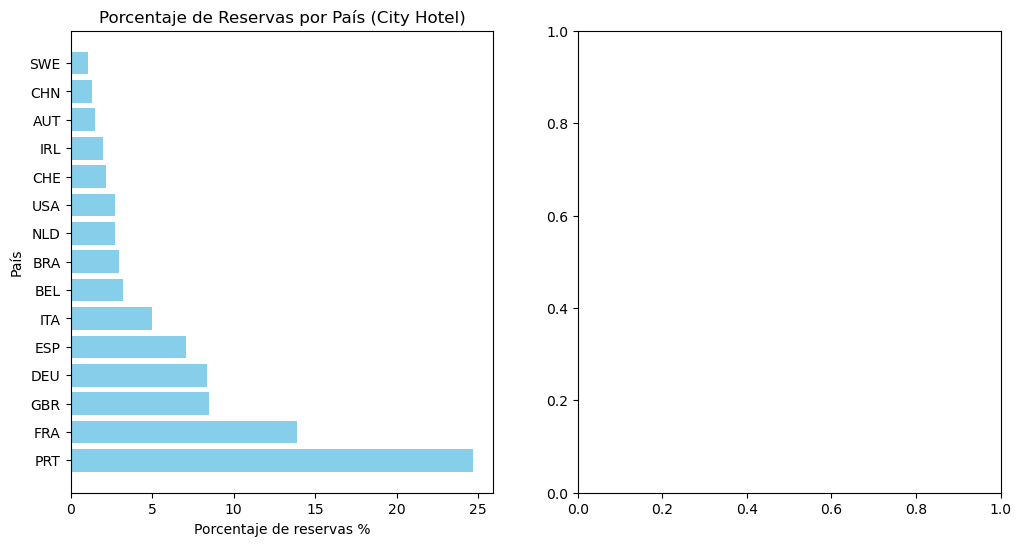

In [22]:
# Creamos la figura y los axes para cada tipo de hotel
fig1, ax1 = plt.subplots(1,2, figsize=(12,6));

ax1[0].barh(country_percentages.index, country_percentages.values, color='skyblue')
ax1[0].set_title('Porcentaje de Reservas por País (City Hotel)')
ax1[0].set_xlabel('Porcentaje de reservas %')
ax1[0].set_ylabel('País')